In [63]:
import numpy as np
import math
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import random
from scipy.stats import entropy
import collections

In [64]:
N = 12
# a = 0
# b = N
# mu = N - 12
# sigma_square = 24 / N**2

length_low = 10
length_up = 1000
step = 10
sample_num = 1000

In [65]:
bernoulli_entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
geom_entropy = -np.log2(p) - (1 - p) * np.log2(1 - p) / p

In [66]:
def estimate_shannon_entropy(dna_sequence):
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
    dist = [x / sum(bases.values()) for x in bases.values()]
    return entropy(dist, base=2)

## Исследуются распределения: Бернулли и геометрическое

### Используем встроенные функции

In [67]:
inbuild_bern = []
inbuild_geom = []
entr_deviation_bern  = []
entr_deviation_geom  = []

for length in range(length_low, length_up + 1, step):    
    for _ in range(K):
        bern = bernoulli.rvs(p, size=length)
        geom = np.random.geometric(p, size=length)
        
        entr_deviation_bern.append(bernoulli_entropy - estimate_shannon_entropy(bern))
        entr_deviation_geom.append(geom_entropy - estimate_shannon_entropy(geom))

    inbuild_bern.append(np.var(entr_deviation_bern))
    inbuild_geom.append(np.var(entr_deviation_geom))

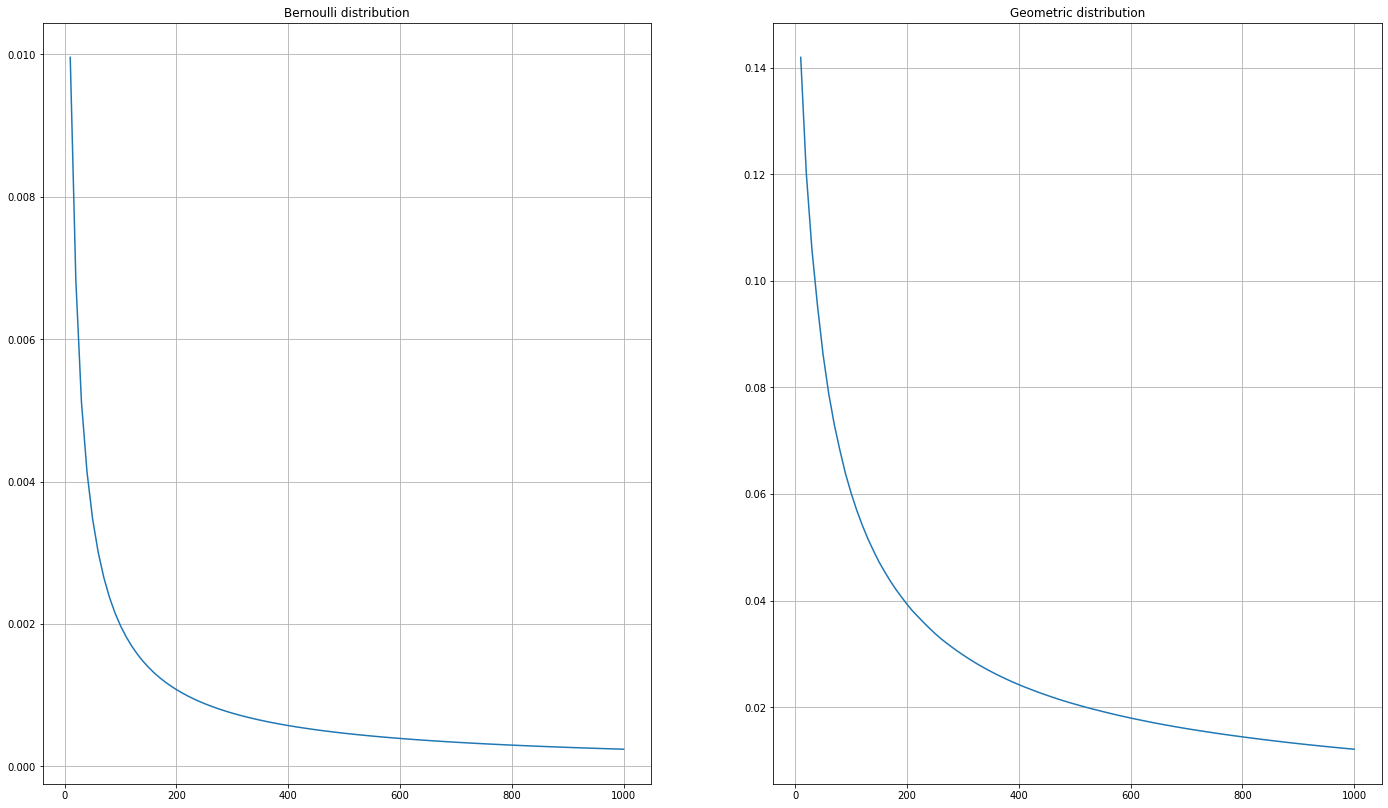

In [68]:
plt.figure(figsize = (24, 14))

plt.subplot(1,2,1)
plt.plot(range(10, 1001, 10), inbuild_bern)
plt.title('Bernoulli distribution')
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(10, 1001, 10), inbuild_geom)
plt.title('Geometric distribution')
plt.grid()

### Исследуем генерацию через базовую св

In [69]:
def bernoulli_sample(p, n):
    rand_arr = [random.random() for i in range(n)]
    return [1 if i >= 1 - p else 0 for i in rand_arr]

In [70]:
def geometric_sample(p, n):
    geom_arr = []
    
    while len(geom_arr) < n:
        k = 1
        while True:
            rand_arr = 1 if random.random() >= 1 - p else 0
            if rand_arr == 1:
                geom_arr.append(k)
                break
            else:
                k += 1
    return geom_arr

In [71]:
brv_bern = []
brv_geom = []
entr_deviation_bern  = []
entr_deviation_geom  = []

for length in range(length_low, length_up + 1, step):
    entr_deviation_bern  = []
    entr_deviation_geom  = []
    
    for _ in range(K):
        bern = generate_bernoulli(p, length)
        geom = generate_geometric(p, length)

        entr_deviation_bern.append(ent_bernoulli - estimate_shannon_entropy(bern))
        entr_deviation_geom.append(ent_geom - estimate_shannon_entropy(geom))

    brv_geom.append(np.var(entr_deviation_geom))
    brv_bern.append(np.var(entr_deviation_bern))

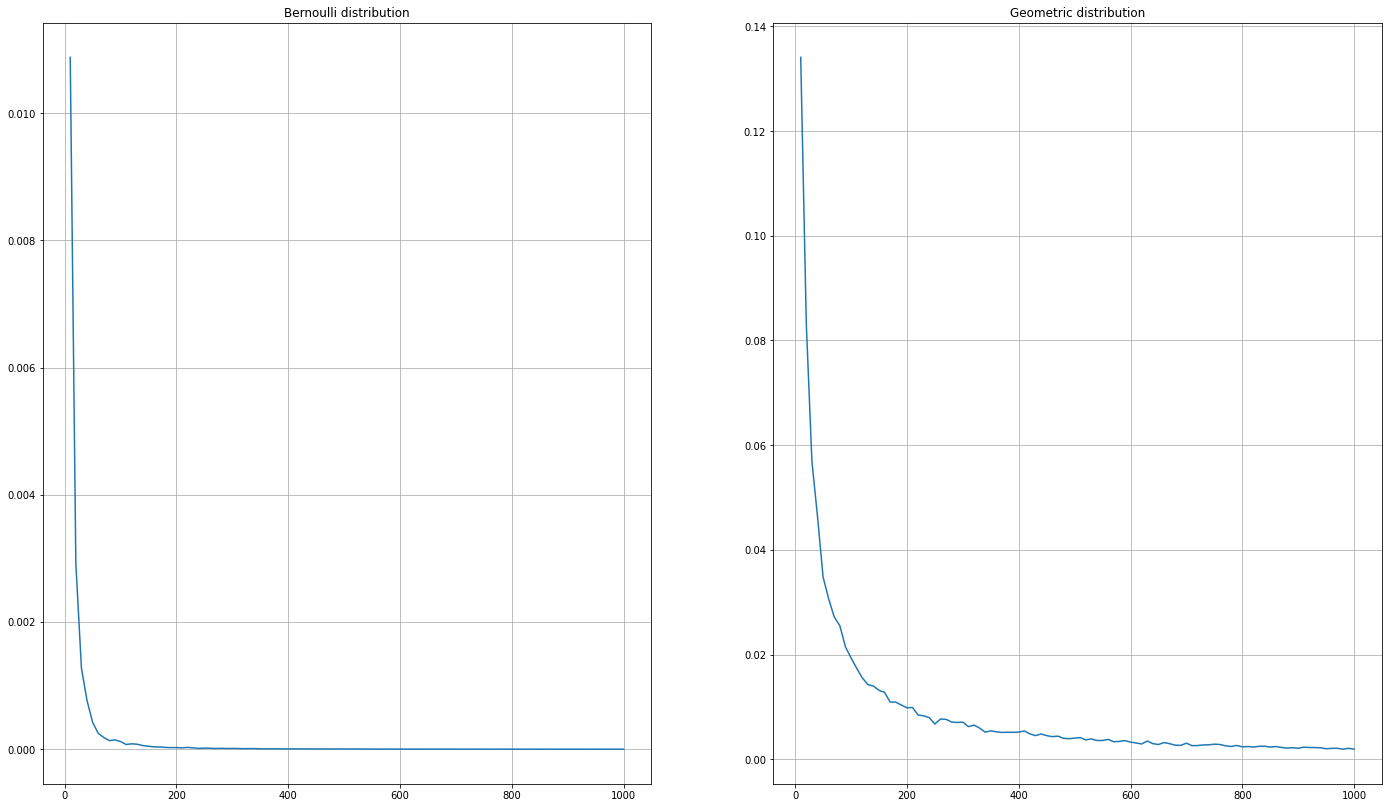

In [72]:
plt.figure(figsize = (24, 14))

plt.subplot(1,2,1)
plt.plot(range(10, 1001, 10), brv_bern)
plt.title('Bernoulli distribution')
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(10, 1001, 10), brv_geom)
plt.title('Geometric distribution')
plt.grid()